# Problem Set 3

**Context:** Consider the dataset ['Impact of COVID-19 on worldwide aviation'](https://zenodo.org/record/4088202#.X5NaZXVKgio),
which concerns the impact of global pandemic on the airline industry.

**Task**: Create **ONE** Matplotlib figure that illustrates the effect of the global pandemic on the airline industry. There are no constraints about the dimensions to include in the figure ― in other words, students are free to emphasize the aspects they find more interesting. However, the plot(s) included in the Matplotlib figure(s) must include the temporal dimension.

**Submission**: Submit your solution via email to simone.santoni.1@city.ac.uk.
Late submissions (> October 28, 2020) may not be considered for the in-class
presentations.


# Description of the dataset

One file per month is provided as a csv file with the following features:

- callsign: the identifier of the flight displayed on ATC screens (usually the first three letters are reserved for an airline: AFR for Air France, DLH for Lufthansa, etc.)
- number: the commercial number of the flight, when available (the matching with the callsign comes from public open API)
- icao24: the transponder unique identification number;
- registration: the aircraft tail number (when available);
- typecode: the aircraft model type (when available);
- origin: a four letter code for the origin airport of the flight (when available);
- destination: a four letter code for the destination airport of the flight (when available);
- firstseen: the UTC timestamp of the first message received by the OpenSky Network;
- lastseen: the UTC timestamp of the last message received by the OpenSky Network;
- day: the UTC day of the last message received by the OpenSky Network;
- latitude_1, longitude_1, altitude_1: the first detected position of the aircraft;
- latitude_2, longitude_2, altitude_2: the last detected position of the aircraft.

## Credit 

If you use this dataset, please cite the original OpenSky paper:

Matthias Schäfer, Martin Strohmeier, Vincent Lenders, Ivan Martinovic and Matthias Wilhelm.
"Bringing Up OpenSky: A Large-scale ADS-B Sensor Network for Research".
In Proceedings of the 13th IEEE/ACM International Symposium on Information Processing in Sensor Networks (IPSN), pages 83-94, April 2014.

and the traffic library used to derive the data:

Xavier Olive.
"traffic, a toolbox for processing and analysing air traffic data."
Journal of Open Source Software 4(39), July 2019.


# Tasks

Create **ONE** Matplotlib figure that illustrates the effect of the global pandemic on the airline industry. There are no constraints about the dimensions to include in the figure ― in other words, students are free to emphasize the aspects they find more interesting. However, the plot(s) included in the Matplotlib figure(s) must include the temporal dimension.

# Import relevant libraries

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Import dataset
Datasets includes flight data from July to September in 2019 and 2020 

In [2]:
# get datasets folder path
base_path = os.path.join(os.getcwd(), 'datasets')
data_2019_path = os.path.join(base_path, '2019')
data_2020_path =os.path.join(base_path, '2020')

# get datasets path
files_2019_path = glob.glob(os.path.join(data_2019_path, '*.csv'))
files_2020_path = glob.glob(os.path.join(data_2020_path, '*.csv'))

In [3]:
# import data
data_2019 = pd.concat(pd.read_csv(file) for file in files_2019_path)
data_2020 = pd.concat(pd.read_csv(file) for file in files_2020_path)

# Data Exploration and Data Preprocessing

In [4]:
# explore data structure
data_2019

,callsign,number,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2
0,ANA106,NaN,867f82,NaN,NaN,KORD,KLAX,2019-06-30 00:03:35+00:00,2019-07-01 00:13:28+00:00,2019-07-01 00:00:00+00:00,41.979309,-87.824083,609.6,33.953018,-118.393324,76.20
1,KQA204,KQ204,04c147,5Y-CYA,B738,FAOR,VABB,2019-06-30 00:45:42+00:00,2019-07-01 00:42:47+00:00,2019-07-01 00:00:00+00:00,-26.109614,28.245638,1524.0,19.088745,72.869911,99.06
2,CES771,MU771,781602,NaN,NaN,YSSY,EHAM,2019-06-30 01:09:12+00:00,2019-07-01 04:09:59+00:00,2019-07-01 00:00:00+00:00,-33.956314,151.178601,0.0,52.316059,4.741402,NaN
3,CSN465,NaN,7805aa,B-2075,B77L,KLAX,EGSS,2019-06-30 01:43:14+00:00,2019-07-01 06:26:53+00:00,2019-07-01 00:00:00+00:00,33.935715,-118.421014,0.0,51.900392,0.257943,114.30
4,CHH7921,NaN,780ff1,B-7880,B789,NaN,EBMB,2019-06-30 01:53:25+00:00,2019-07-01 05:40:58+00:00,2019-07-01 00:00:00+00:00,29.960369,106.983984,3657.6,50.903412,4.542624,83.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2721738,N787WW,NaN,aaac90,N787WW,NaN,NaN,KDVT,2019-09-30 23:46:20+00:00,2019-09-30 23:57:51+00:00,2019-09-30 00:00:00+00:00,33.846736,-112.158566,914.4,33.691205,-112.070446,601.98
2721739,LVN,NaN,7c3ab1,VH-LVN,C208,YWOL,YWOL,2019-09-30 23:48:33+00:00,2019-09-30 23:59:50+00:00,2019-09-30 00:00:00+00:00,-34.516995,150.823975,609.6,-34.509384,150.824404,670.56
2721740,N972NC,NaN,ad8c42,N972NC,NaN,KIXD,68KS,2019-09-30 23:48:44+00:00,2019-09-30 23:59:47+00:00,2019-09-30 00:00:00+00:00,38.799940,-94.886353,609.6,38.585800,-94.846558,1127.76
2721741,N5457J,NaN,a6edd5,N5457J,NaN,KBWC,KIPL,2019-09-30 23:48:49+00:00,2019-09-30 23:59:14+00:00,2019-09-30 00:00:00+00:00,32.975231,-115.483797,304.8,32.856895,-115.576228,297.18


In [5]:
# reset index
data_2019.reset_index(drop = True, inplace = True)
data_2020.reset_index(drop = True, inplace = True)

In [6]:
print(data_2019['callsign'].isnull().sum())
print(data_2020['callsign'].isnull().sum())

0
0


In [7]:
print(data_2019['day'].isnull().sum())
print(data_2020['day'].isnull().sum())

0
0


In [8]:
data_2019['destination'].isnull().sum()

1991677

In [9]:
# subset only necessary columns
data_2019 = data_2019[['callsign', 'day']]
data_2020 = data_2020[['callsign', 'day']]

## The analysis will only focus on All Nippon Airways(ANA) where `signcode` should starts with 'ANA'

In [10]:
data_2019 = data_2019[data_2019['callsign'].str.contains('ANA')]
data_2020 = data_2020[data_2020['callsign'].str.contains('ANA')]

## Transform `day` to datetime format and decompose the data

In [11]:
date = pd.to_datetime(data_2019['day'])
data_2019.loc[:, 'day'] = date.dt.strftime('%Y-%m-%d')
data_2019.loc[:, 'year'] = date.dt.strftime('%Y')
data_2019.loc[:, 'month'] = date.dt.strftime('%m')
data_2019.head()

,callsign,day,year,month
0,ANA106,2019-07-01,2019,07
43,ANA223,2019-07-01,2019,07
64,ANA211,2019-07-01,2019,07
74,ANA215,2019-07-01,2019,07
405,ANA10,2019-07-01,2019,07


In [12]:
date = pd.to_datetime(data_2020['day'])
data_2020.loc[:, 'day'] = date.dt.strftime('%Y-%m-%d')
data_2020.loc[:, 'year'] = date.dt.strftime('%Y')
data_2020.loc[:, 'month'] = date.dt.strftime('%m')
data_2020.head()

,callsign,day,year,month
80,ANA8401,2020-07-01,2020,07
547,ANA9101,2020-07-01,2020,07
1119,ANA241,2020-07-01,2020,07
1414,ANA242,2020-07-01,2020,07
1460,ANA791,2020-07-01,2020,07


## Get frequency data

In [13]:
df_2019 = pd.DataFrame(data_2019.groupby(['year', 'month'])['callsign'].agg('count'))
df_2019

callsign
year month          
2019 07        18376
     08        18594
     09        16820

In [14]:
df_2020 = pd.DataFrame(data_2020.groupby(['year', 'month'])['callsign'].agg('count'))
df_2020

callsign
year month          
2020 07         9399
     08        14256
     09         9744

In [15]:
# Some stats: percentage drop
jul_drop = 100 - (df_2020.callsign[0] / df_2019.callsign[0] * 100)
aug_drop = 100 - (df_2020.callsign[1] / df_2019.callsign[1] * 100)
sep_drop = 100 - (df_2020.callsign[2] / df_2019.callsign[2] * 100)

In [16]:
# summary text
sum_text = " - July: {:.2f}%\n - August: {:.2f}%\n - September: {:.2f}%".format(jul_drop, aug_drop, sep_drop)

In [17]:
ana_logo = image.imread('ana-vector-logo.png')

# Visualization

<ipython-input-18-9f8df2507949>:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick_label, fontsize = 11)


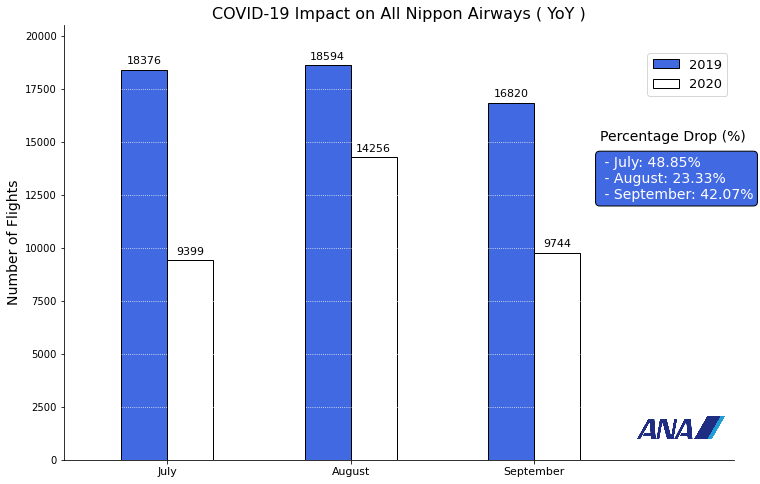

In [18]:
""" Setup """
font = {'fontname':'Helvetica'}

fig = plt.figure(figsize = (12, 8))

ax = fig.add_subplot(1, 1, 1)

tick_label = ['July', 'August', 'September']
label_loc = np.arange(len(tick_label))
bar_width = 0.25

bars_2019 = ax.bar(label_loc - bar_width / 2, height = df_2019['callsign'], width = bar_width, 
        color = 'royalblue', edgecolor = 'k', label = '2019')
bars_2020 = ax.bar(label_loc + bar_width / 2, height = df_2020['callsign'], width = bar_width,
        color = 'white', edgecolor = 'k', label = '2020')


# label each bar by frequency
for bar in bars_2019:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy = (bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),  # raise the y-coordinate by 4 points
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 11)
    
# label each bar by frequency
for bar in bars_2020:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy = (bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),  # raise the y-coordinate by 4 points
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 11)
    
# add text box
props = dict(boxstyle='round', facecolor='royalblue')

# place a text box 
ax.text(0.8, 0.7, sum_text, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props, color = 'w')

# add textbox title
ax.text(0.8, 0.76, "Percentage Drop (%)", transform=ax.transAxes, fontsize=14,
        verticalalignment='top', color = 'k')

# add ANA logo
imagebox = OffsetImage(ana_logo, zoom=0.1)
ab = AnnotationBbox(imagebox, xy = (2.8, 1500), frameon = False)
ax.add_artist(ab)

# rescale axes to add some more space
ax.set_ylim(top = ax.get_ylim()[1]*1.05)
ax.set_xlim(right = ax.get_xlim()[1]*1.3)
ax.set_xlim(left = ax.get_xlim()[0]*1.5)

# set tick label and location
ax.set_xticklabels(tick_label, fontsize = 11)
ax.set_xticks(label_loc)

ax.legend(loc='upper right', bbox_to_anchor=(1, 0.95), fontsize = 13)

# axis-label
ax.set_ylabel("Number of Flights", fontsize = 14)
ax.set_title("COVID-19 Impact on All Nippon Airways ( YoY )", fontsize = 16)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.grid(True, axis = 'y', color = 'white', ls = ':')

plt.savefig('prob3_visualization.pdf')  

plt.show()